In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# load the data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target

print(data.target_names)

df

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
k=3

# create model
model = KNeighborsClassifier(n_neighbors=k)

# training
model.fit(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], df.label) 

# predict using model.predict()

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## **Vấn đề:** chọn k = ?
- `k = 1` dễ dẫn tới `overfitting`

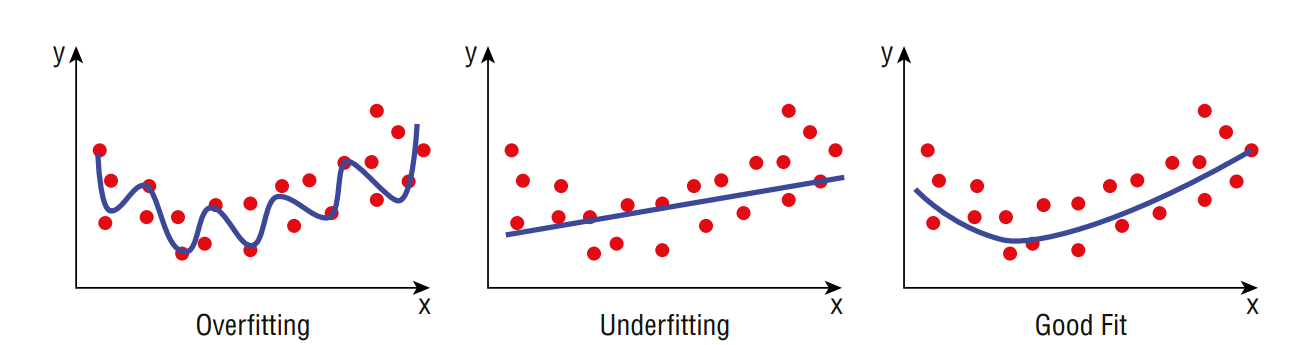

- chọn `k=?` -> **`Cross Validation`**

best k: 13


Text(0, 0.5, 'Mean accuracy')

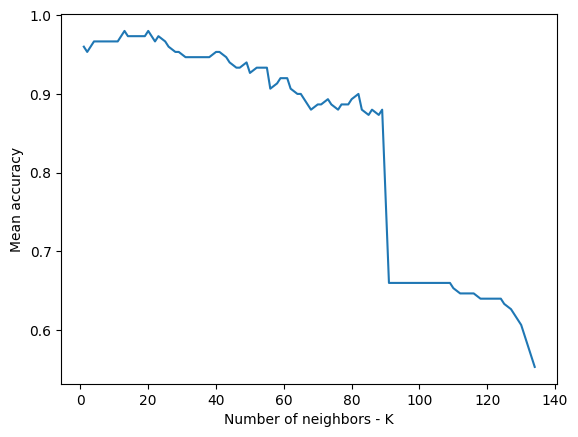

In [3]:
from sklearn.model_selection import cross_val_score

x, y = load_iris(return_X_y=True)

folds = 10 # chia dữ liệu thành 10 folds -> 150 bộ = 10 tập 15 bộ
# mỗi lần dùng folds-1 để train và folds để test
ks = list(range(1, int(len(x)*((folds-1)/folds)))) # 1 -> số mẫu tối đã có tại tập train

# có n label, loại bỏ bội của n (tránh hòa phiếu)
K = []
for k in ks:
    if k%3==0: continue
    else: K.append(k)

cv_score=[] # mean accuracy score
for k in K:
    model = KNeighborsClassifier(n_neighbors=k)

    # avg accuracy
    scores = cross_val_score(model, x, y, cv=folds, scoring='accuracy')
    mean = scores.mean()

    cv_score.append(mean)
    # print(k, mean, sep=' -> ')


optimal_k = K[cv_score.index(max(cv_score))]
print(f'best k: {optimal_k}')

plt.plot(K, cv_score)
plt.xlabel('Number of neighbors - K')
plt.ylabel('Mean accuracy')